Welcome to this interactive python session. This should be considered supplementary content to the chapter. We would strongly advise you to read the chapter before trying the hands-on sessions.

This session will talk about convolution.

We encourage you to play around with the numbers as much as possible to get a good feel for the topic. Come to your own conclusions and let us know if you observe some interesting behaviour!



In [0]:
import numpy as np
from tabulate import tabulate
import scipy.signal as sc
import matplotlib.pyplot as plt


For the sake of intuition, lets take a two very basic signals: *base* and *kernel*. We will first calculate the convolution of kernel with base and then of base with kernel. Finally we will compare these convolutions.

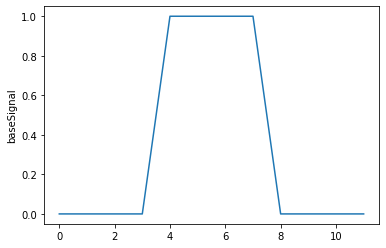

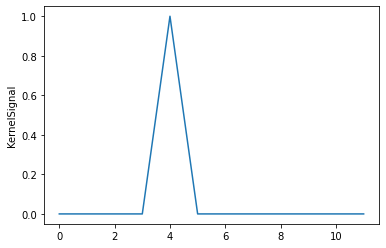

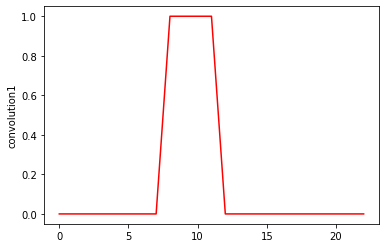

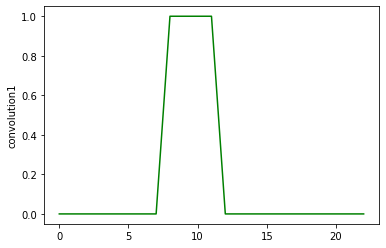

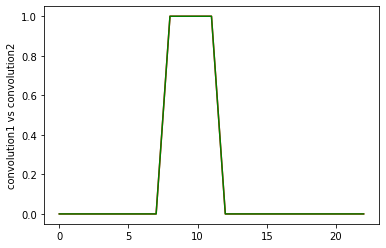

In [0]:
baseSignal=[0,0,0,0,1, 1, 1, 1,0,0,0,0]
plt.plot(baseSignal)
plt.ylabel('baseSignal')
plt.show()
KernelSignal=[0,0,0,0,1,0,0,0,0,0,0,0]
plt.plot(KernelSignal)
plt.ylabel('KernelSignal')
plt.show()
convolution1=sc.convolve(KernelSignal,baseSignal)
convolution2=sc.convolve(baseSignal,KernelSignal)
plt.plot(convolution1,'r')
plt.ylabel('convolution1')
plt.show()
plt.plot(convolution2,'g')
plt.ylabel('convolution1')
plt.show()
plt.plot(convolution1,'r')
plt.plot(convolution2,'g')
plt.ylabel('convolution1 vs convolution2')
plt.show()

Lets now take a more complex 2-D example. First we will solve this using the scipy API and then try to work out the calculation on our own.


In [0]:
base = np.array([[1,2,3],[4,5,6],[7,8,9]])
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print("Say our image is:")
print(tabulate(base, tablefmt="fancy_grid"))
print("And, the kernel is:")
print(tabulate(kernel, tablefmt="fancy_grid"))

Say our image is:
╒═══╤═══╤═══╕
│ 1 │ 2 │ 3 │
├───┼───┼───┤
│ 4 │ 5 │ 6 │
├───┼───┼───┤
│ 7 │ 8 │ 9 │
╘═══╧═══╧═══╛
And, the kernel is:
╒════╤════╤════╕
│ -1 │ -2 │ -1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│  1 │  2 │  1 │
╘════╧════╧════╛


In [0]:
convolution=sc.convolve2d(base,kernel)
print("output of cross correlation:")
print(tabulate(convolution, tablefmt="fancy_grid"))

output of cross correlation:
╒════╤═════╤═════╤═════╤════╕
│ -1 │  -4 │  -8 │  -8 │ -3 │
├────┼─────┼─────┼─────┼────┤
│ -4 │ -13 │ -20 │ -17 │ -6 │
├────┼─────┼─────┼─────┼────┤
│ -6 │ -18 │ -24 │ -18 │ -6 │
├────┼─────┼─────┼─────┼────┤
│  4 │  13 │  20 │  17 │  6 │
├────┼─────┼─────┼─────┼────┤
│  7 │  22 │  32 │  26 │  9 │
╘════╧═════╧═════╧═════╧════╛


##Manually computing convolution


Remember, since we are doing convolution and not correlation, we will flip the kernel. This flip is done both from bottom to top and from left to right. Note that for symmetric kernels this operation does not change the kernel. In our case, after the flipping operation, the kernel will look like:

In [0]:
kernelFlipped = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print("flipped kernel:")
print(tabulate(kernelFlipped, tablefmt="fancy_grid"))

flipped kernel:
╒════╤════╤════╕
│  1 │  2 │  1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│ -1 │ -2 │ -1 │
╘════╧════╧════╛



Now for the calculations, we zero pad our base image. 

In [0]:
zeroPad=np.pad(base,2,mode='constant')
print("zero padded image:")
print(tabulate(zeroPad, tablefmt="fancy_grid"))

zero padded image:
╒═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 2 │ 3 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 4 │ 5 │ 6 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 7 │ 8 │ 9 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╛


Let's use the formula to cross check the values.


$G[i,j]=\sum_{u=-k}^{k}\sum_{v=-k}^{k}H[u,v]F[i-u,j-v]$





In this zero padded base image, we can calculate the convolution output as follows:



```
top left 3x3 square:
1x0+2x0+1x0+0x0+0x0+0x0+(-1x0)+(-2x0)+(-1x1) = -1

top left 3x3 square shift one unit to the right:
1x0+2x0+1x0+0x0+0x0+0x0+(-1x0)+(-2x1)+(-1x2) = -4

top left 3x3 square shift 2 units to the right:
1x0+2x0+1x0+0x0+0x0+0x0+(-1x1)+(-2x2)+(-1x3) = -8

and so on..

```



